In [1]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 10111678513554358942
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 5863636992
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 16609683661374423356
 physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3060 Ti, pci bus id: 0000:01:00.0, compute capability: 8.6"
 xla_global_id: 416903419]

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import category_encoders as ce
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv("theme2_train/train.csv")

In [4]:
df

,id,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,train_00000,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,train_00001,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,train_00002,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
3,train_00003,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
4,train_00004,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84354,train_84354,2017-06-17,Uluru,6.4,23.4,0.0,NaN,NaN,ESE,31.0,...,53.0,25.0,1025.8,1023.0,NaN,NaN,11.2,23.1,No,No
84355,train_84355,2017-06-18,Uluru,8.0,20.7,0.0,NaN,NaN,ESE,41.0,...,56.0,32.0,1028.1,1024.3,NaN,7.0,11.6,20.0,No,No
84356,train_84356,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
84357,train_84357,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No


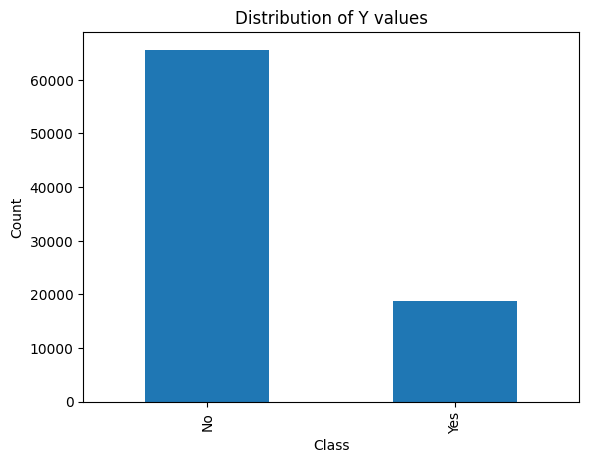

In [5]:
df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.month
df['Day'] = pd.to_datetime(df['Date']).dt.day
X = df.drop(['id', 'RainTomorrow', 'Date'], axis=1)
Y = df['RainTomorrow']
Y.value_counts().plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Y values')
plt.show()

In [6]:
Y.head(10)

0     No
1     No
2     No
3     No
4     No
5     No
6    Yes
7    Yes
8    Yes
9     No
Name: RainTomorrow, dtype: object

In [7]:
X['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

Location
Canberra            2037
Sydney              1997
Hobart              1914
Perth               1914
Darwin              1914
Brisbane            1878
Townsville          1816
Bendigo             1816
AliceSprings        1813
MountGambier        1813
Launceston          1809
Ballarat            1808
Adelaide            1805
PerthAirport        1804
MelbourneAirport    1804
Mildura             1801
Nuriootpa           1799
SydneyAirport       1798
Albury              1794
Watsonia            1791
Sale                1790
Albany              1789
Woomera             1789
Portland            1789
Cobar               1785
Cairns              1778
Tuggeranong         1773
WaggaWagga          1772
NorfolkIsland       1766
Dartmoor            1764
CoffsHarbour        1764
SalmonGums          1762
Wollongong          1761
Newcastle           1758
GoldCoast           1755
Witchcliffe         1752
Penrith             1747
Richmond            1734
NorahHead           1726
BadgerysCreek   

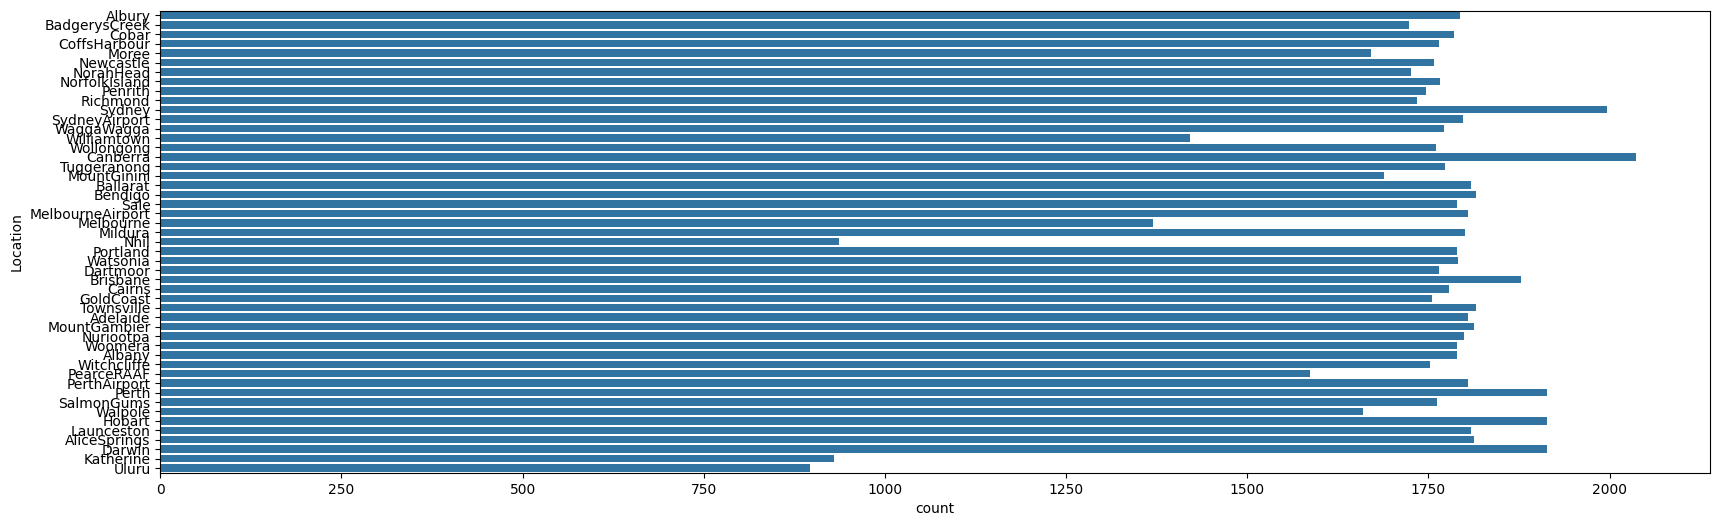

In [8]:
import seaborn as sns

plt.figure(figsize=(20,6))
sns.countplot(X['Location'])
print(X['Location'].value_counts())

In [9]:
X.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,84075.000000,84178.000000,84359.000000,48599.000000,44347.000000,78883.000000,83713.000000,82843.000000,83444.000000,82292.000000,76110.000000,76098.000000,52826.000000,50746.000000,83961.000000,82807.000000,84359.000000,84359.000000,84359.000000
mean,12.185245,23.248617,2.324496,5.484098,7.655923,40.032504,14.000358,18.673587,68.709194,51.358771,1017.625354,1015.237378,4.417332,4.484294,16.993633,21.703236,2012.754253,6.418936,15.832419
std,6.402816,7.125196,8.320730,4.201555,3.767285,13.652409,8.905390,8.826885,19.019853,20.769290,7.149958,7.089172,2.884603,2.717326,6.500955,6.944862,2.541461,3.432660,8.793010
min,-8.200000,-4.800000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,982.000000,977.100000,0.000000,0.000000,-7.200000,-5.400000,2007.000000,1.000000,1.000000
25%,7.600000,17.900000,0.000000,2.600000,5.000000,31.000000,7.000000,13.000000,57.000000,36.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,2011.000000,3.000000,8.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,2013.000000,6.000000,16.000000
75%,16.800000,28.300000,0.600000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,65.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.500000,2015.000000,9.000000,24.000000
max,33.900000,48.100000,371.000000,145.000000,14.200000,135.000000,130.000000,87.000000,100.000000,100.000000,1040.600000,1038.500000,9.000000,8.000000,38.900000,46.700000,2017.000000,12.000000,31.000000


                MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
MinTemp        1.000000  0.736201  0.104589     0.463452  0.073423   
MaxTemp        0.736201  1.000000 -0.074762     0.583294  0.469196   
Rainfall       0.104589 -0.074762  1.000000    -0.061132 -0.230184   
Evaporation    0.463452  0.583294 -0.061132     1.000000  0.367415   
Sunshine       0.073423  0.469196 -0.230184     0.367415  1.000000   
WindGustSpeed  0.172721  0.068736  0.125621     0.205742 -0.027650   
WindSpeed9am   0.172636  0.008913  0.086331     0.192581  0.012553   
WindSpeed3pm   0.172599  0.051688  0.050653     0.131509  0.057915   
Humidity9am   -0.235095 -0.505177  0.223559    -0.501529 -0.495924   
Humidity3pm    0.005968 -0.506744  0.253982    -0.388588 -0.629110   
Pressure9am   -0.450331 -0.334719 -0.166370    -0.272135  0.035399   
Pressure3pm   -0.462124 -0.431849 -0.122798    -0.294196 -0.026576   
Cloud9am       0.076499 -0.291053  0.201158    -0.183023 -0.678338   
Cloud3pm       0.021

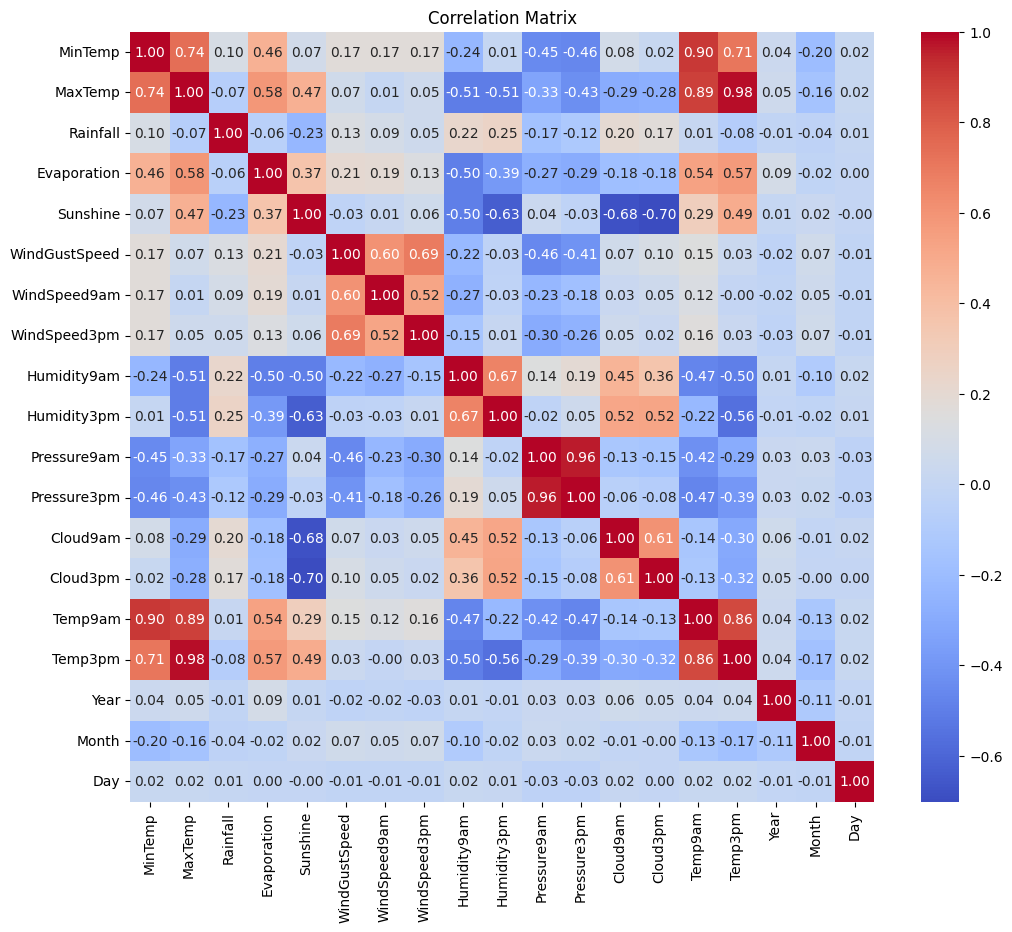

In [10]:
# Display the correlation matrix for the dataframe X
df_num =  df.select_dtypes(include=[np.number])
correlation_matrix = df_num.corr()
print(correlation_matrix)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [11]:
# sns.pairplot(df_num)
# plt.show()

In [12]:
# Define a function to identify outliers using IQR
def identify_outliers(df, column):
    Q1 = df[column].quantile(0.05)
    Q3 = df[column].quantile(0.95)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)].index

# Identify outliers in the specified columns
# outliers_rainfall = identify_outliers(df_num, 'Rainfall')
outliers_evaporation = identify_outliers(df_num, 'Evaporation')
outliers_windspeed9am = identify_outliers(df_num, 'WindSpeed9am')
outliers_cloud9am = identify_outliers(df_num, 'Cloud9am')

# Combine all outlier indices
# all_outliers = set(outliers_rainfall).union(set(outliers_evaporation)).union(set(outliers_windspeed9am)).union(set(outliers_cloud9am))
all_outliers = set(outliers_evaporation).union(set(outliers_windspeed9am)).union(set(outliers_cloud9am))

# Remove outliers from df
df_cleaned = df.drop(index=all_outliers)

# Display the cleaned dataframe
print(df.shape)
print(df_cleaned.shape)

(84359, 27)
(84220, 27)


In [13]:
df_cleaned_num =  df_cleaned.select_dtypes(include=[np.number])

In [14]:
# sns.pairplot(X_cleaned_num)
# plt.show()

In [15]:
df_cleaned_num.skew().sort_values(ascending=False)

Rainfall         9.623236
Evaporation      1.322094
WindGustSpeed    0.876848
WindSpeed9am     0.763445
WindSpeed3pm     0.629991
Temp3pm          0.244918
MaxTemp          0.232318
Temp9am          0.089152
Humidity3pm      0.040719
Month            0.024370
MinTemp          0.022078
Day              0.007773
Pressure3pm     -0.037702
Year            -0.041012
Pressure9am     -0.095656
Cloud9am        -0.215932
Cloud3pm        -0.218719
Humidity9am     -0.473668
Sunshine        -0.511155
dtype: float64

In [16]:
from sklearn.preprocessing import power_transform
df_num_filtered = power_transform(df_cleaned_num)  
df_cleaned[df_cleaned_num.columns] = df_num_filtered
df_cleaned.select_dtypes(include=[np.number]).skew().sort_values(ascending=False)

Rainfall         1.010181
Temp3pm          0.048421
MaxTemp          0.029039
WindSpeed3pm     0.017358
WindGustSpeed    0.006206
Pressure9am      0.002127
Pressure3pm      0.000599
Year            -0.010372
Evaporation     -0.012619
Temp9am         -0.012908
WindSpeed9am    -0.059780
MinTemp         -0.067886
Humidity3pm     -0.086786
Humidity9am     -0.111844
Month           -0.161071
Day             -0.207569
Cloud3pm        -0.286405
Cloud9am        -0.305946
Sunshine        -0.358973
dtype: float64

C:\Users\riuru\AppData\Local\Temp\ipykernel_10332\3946321331.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Rainfall'].dropna(), kde=False, bins=30)
C:\Users\riuru\AppData\Local\Temp\ipykernel_10332\3946321331.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned['Rainfall'].dr

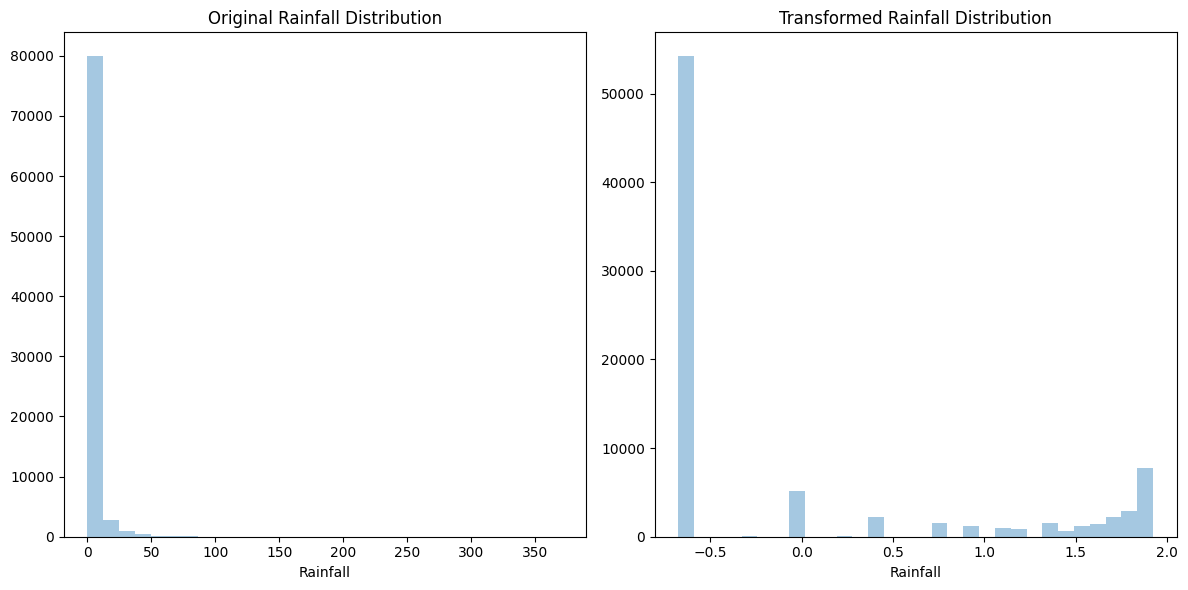

In [17]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.distplot(df['Rainfall'].dropna(), kde=False, bins=30)
plt.title('Original Rainfall Distribution')

plt.subplot(1, 2, 2)
sns.distplot(df_cleaned['Rainfall'].dropna(), kde=False, bins=30)
plt.title('Transformed Rainfall Distribution')

plt.tight_layout()
plt.show()

                MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
MinTemp        1.000000  0.737290  0.039916     0.551506  0.080340   
MaxTemp        0.737290  1.000000 -0.284388     0.681898  0.479560   
Rainfall       0.039916 -0.284388  1.000000    -0.291749 -0.388489   
Evaporation    0.551506  0.681898 -0.291749     1.000000  0.422294   
Sunshine       0.080340  0.479560 -0.388489     0.422294  1.000000   
WindGustSpeed  0.207032  0.095883  0.140062     0.266492 -0.000730   
WindSpeed9am   0.192655  0.020118  0.096726     0.217741  0.026128   
WindSpeed3pm   0.181515  0.063837  0.072155     0.183259  0.068056   
Humidity9am   -0.240394 -0.497646  0.422892    -0.572129 -0.513430   
Humidity3pm    0.002018 -0.509789  0.428000    -0.433511 -0.624803   
Pressure9am   -0.454567 -0.335459 -0.179960    -0.327335  0.028601   
Pressure3pm   -0.462728 -0.429267 -0.085739    -0.352766 -0.032469   
Cloud9am       0.083255 -0.287940  0.358399    -0.207455 -0.675705   
Cloud3pm       0.024

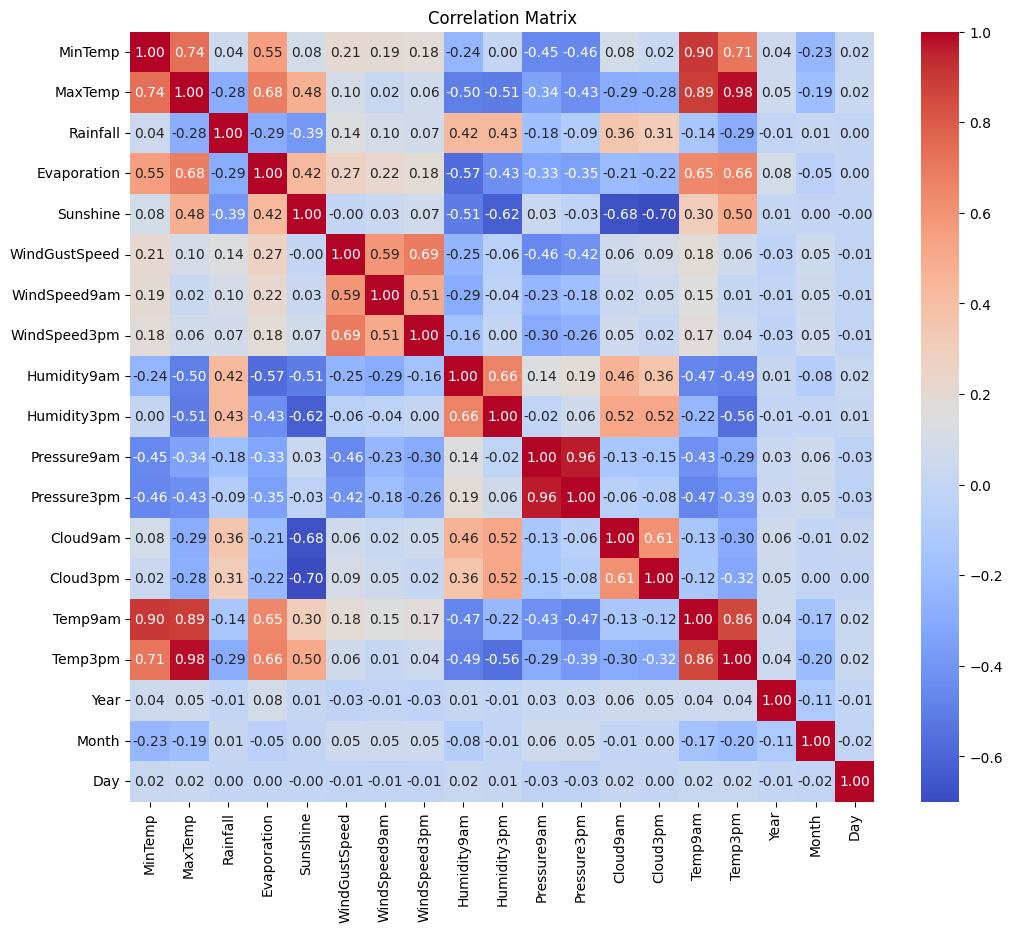

In [18]:
# Display the correlation matrix for the dataframe X
df_cleaned_num =  df_cleaned.select_dtypes(include=[np.number])
correlation_matrix = df_cleaned_num.corr()
print(correlation_matrix)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [19]:
vif = np.diag(np.linalg.inv(df_cleaned_num.corr().values))
df_vif = pd.DataFrame(vif)
df_vif.columns = ["VIF"]
df_vif.index = df_cleaned_num.corr().columns
df_vif.sort_values("VIF")

,VIF
Day,1.003963
Year,1.045892
Month,1.187967
Rainfall,1.603298
WindSpeed9am,1.848393
WindSpeed3pm,2.132573
Cloud9am,2.286013
Cloud3pm,2.293088
Evaporation,2.560841
WindGustSpeed,2.859035


In [20]:
# Identify columns with VIF greater than 10
high_vif_columns = df_vif[df_vif['VIF'] > 10].index

# Drop these columns from df_cleaned
df_cleaned_reduced = df_cleaned.drop(columns=high_vif_columns)

# Display the reduced dataframe
print(df_cleaned.shape)
print(df_cleaned_reduced.shape)
df_cleaned_reduced.columns

(84220, 27)
(84220, 22)


Index(['id', 'Date', 'Location', 'MinTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Cloud9am', 'Cloud3pm', 'RainToday', 'RainTomorrow', 'Year', 'Month',
       'Day'],
      dtype='object')

In [21]:
df_cleaned_reduced['WindGustDir'].unique()

array(['W', 'WNW', 'N', 'NNE', 'ENE', 'SSE', 'S', 'NE', 'WSW', 'NW', 'SW',
       'NNW', 'ESE', nan, 'SE', 'SSW', 'E'], dtype=object)

In [22]:
# Define the mapping for WindGustDir, WindDir9am, and WindDir3pm
wind_dir_mapping = {
    'N': 1, 'NNE': 2, 'NE': 3, 'ENE': 4, 'E': 5, 'ESE': 6, 'SE': 7, 'SSE': 8,
    'S': 9, 'SSW': 10, 'SW': 11, 'WSW': 12, 'W': 13, 'WNW': 14, 'NW': 15, 'NNW': 16
}

# Map the WindGustDir, WindDir9am, and WindDir3pm values to numbers
df_cleaned_reduced['WindGustDir'] = df_cleaned_reduced['WindGustDir'].map(wind_dir_mapping)
df_cleaned_reduced['WindDir9am'] = df_cleaned_reduced['WindDir9am'].map(wind_dir_mapping)
df_cleaned_reduced['WindDir3pm'] = df_cleaned_reduced['WindDir3pm'].map(wind_dir_mapping)

# Replace NaN values with the mean of the respective columns
df_cleaned_reduced['WindGustDir'].fillna(df_cleaned_reduced['WindGustDir'].mean(), inplace=True)
df_cleaned_reduced['WindDir9am'].fillna(df_cleaned_reduced['WindDir9am'].mean(), inplace=True)
df_cleaned_reduced['WindDir3pm'].fillna(df_cleaned_reduced['WindDir3pm'].mean(), inplace=True)

# Display the updated dataframe
df_cleaned_reduced[['WindGustDir', 'WindDir9am', 'WindDir3pm']].head()

C:\Users\riuru\AppData\Local\Temp\ipykernel_10332\4026701468.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned_reduced['WindGustDir'].fillna(df_cleaned_reduced['WindGustDir'].mean(), inplace=True)
C:\Users\riuru\AppData\Local\Temp\ipykernel_10332\4026701468.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are

,WindGustDir,WindDir9am,WindDir3pm
0,13.0,13.0,14.0
1,14.0,16.0,12.0
2,13.0,4.0,15.0
3,14.0,13.0,13.0
4,13.0,11.0,13.0


In [23]:
encX = ce.OrdinalEncoder(cols=['Location', 'RainToday'])
encY = ce.OrdinalEncoder(cols=['RainTomorrow'])
df_cleaned_reduced = encX.fit_transform(df_cleaned_reduced)
df_cleaned_reduced = encY.fit_transform(df_cleaned_reduced)

<Axes: xlabel='RainTomorrow'>

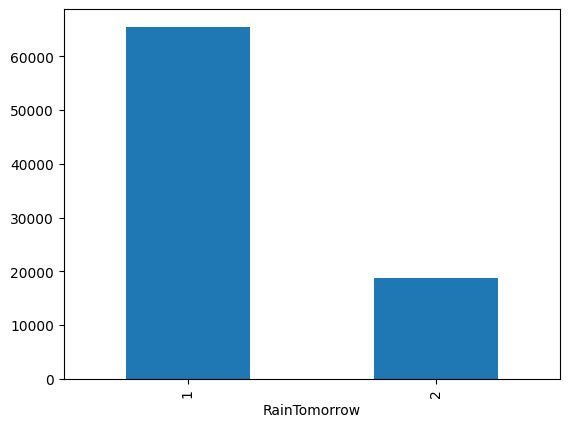

In [24]:
df_cleaned_reduced['RainTomorrow'].value_counts().plot(kind='bar')

In [25]:
df_cleaned_reduced.columns

Index(['id', 'Date', 'Location', 'MinTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Cloud9am', 'Cloud3pm', 'RainToday', 'RainTomorrow', 'Year', 'Month',
       'Day'],
      dtype='object')

In [26]:
X = df_cleaned_reduced.drop(['id', 'RainTomorrow', 'Date'], axis=1)
Y = df_cleaned_reduced['RainTomorrow']

In [27]:
from imblearn.combine import SMOTEENN
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

scaler = StandardScaler()
X = scaler.fit_transform(X)


# smote_enn = SMOTEENN(random_state=42)
# X_resampled, Y_resampled = smote_enn.fit_resample(X, Y)
# X = X_resampled
# Y = Y_resampled-1
# X
Y = Y - 1
Y

0        0
1        0
2        0
3        0
4        0
        ..
84354    0
84355    0
84356    0
84357    0
84358    0
Name: RainTomorrow, Length: 84220, dtype: int32

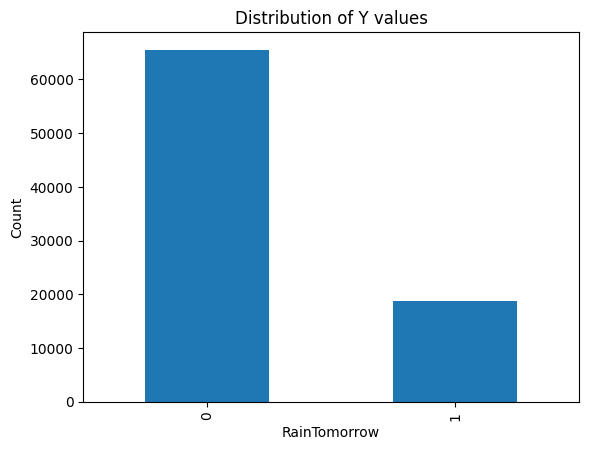

In [28]:
Y.value_counts().plot(kind='bar')
plt.xlabel('RainTomorrow')
plt.ylabel('Count')
plt.title('Distribution of Y values')
plt.show()

In [29]:
# historyの図示
def compare_TV(history):
    import matplotlib.pyplot as plt

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()
    

Fold 1
(67376, 19)
(67376,)
(16844, 19)
(16844,)
Epoch 1/1000
527/527 [==============================] - 4s 3ms/step - loss: 0.4247 - accuracy: 0.8049 - val_loss: 0.3688 - val_accuracy: 0.8405
Epoch 2/1000
527/527 [==============================] - 1s 3ms/step - loss: 0.3675 - accuracy: 0.8433 - val_loss: 0.3625 - val_accuracy: 0.8431
Epoch 3/1000
527/527 [==============================] - 1s 3ms/step - loss: 0.3623 - accuracy: 0.8452 - val_loss: 0.3591 - val_accuracy: 0.8423
Epoch 4/1000
527/527 [==============================] - 1s 3ms/step - loss: 0.3591 - accuracy: 0.8474 - val_loss: 0.3578 - val_accuracy: 0.8426
Epoch 5/1000
527/527 [==============================] - 1s 3ms/step - loss: 0.3565 - accuracy: 0.8478 - val_loss: 0.3557 - val_accuracy: 0.8453
Epoch 6/1000
527/527 [==============================] - 1s 3ms/step - loss: 0.3541 - accuracy: 0.8483 - val_loss: 0.3533 - val_accuracy: 0.8462
Epoch 7/1000
527/527 [==============================] - 1s 3ms/step - loss: 0.3526 - ac

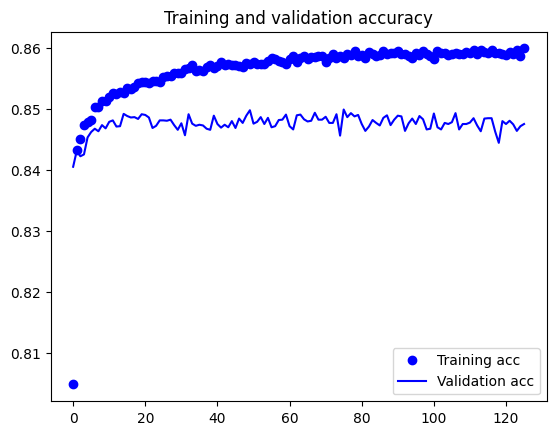

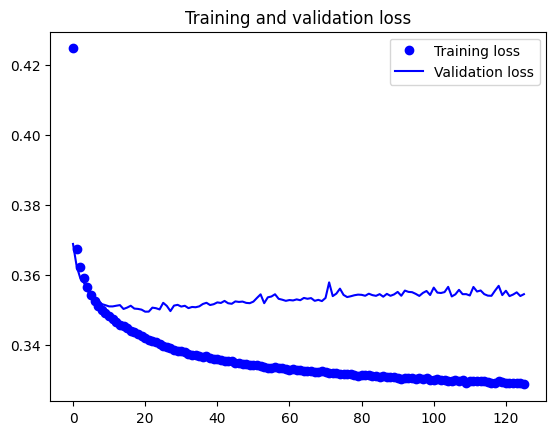

Training Accuracy:  0.8599204421043396
Validation Accuracy:  0.8475421667098999
527/527 [==============================] - 1s 1ms/step


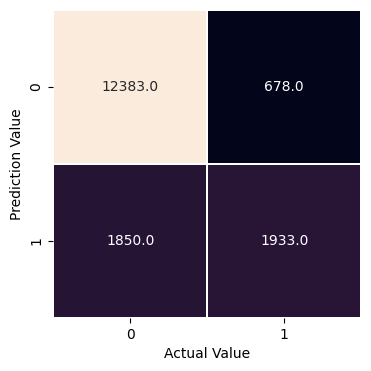

Fold 2
(67376, 19)
(67376,)
(16844, 19)
(16844,)
Epoch 1/1000
527/527 [==============================] - 3s 5ms/step - loss: 0.4118 - accuracy: 0.8164 - val_loss: 0.3745 - val_accuracy: 0.8391
Epoch 2/1000
527/527 [==============================] - 2s 4ms/step - loss: 0.3645 - accuracy: 0.8438 - val_loss: 0.3647 - val_accuracy: 0.8462
Epoch 3/1000
527/527 [==============================] - 2s 4ms/step - loss: 0.3583 - accuracy: 0.8460 - val_loss: 0.3624 - val_accuracy: 0.8457
Epoch 4/1000
527/527 [==============================] - 2s 4ms/step - loss: 0.3550 - accuracy: 0.8484 - val_loss: 0.3604 - val_accuracy: 0.8478
Epoch 5/1000
527/527 [==============================] - 2s 4ms/step - loss: 0.3527 - accuracy: 0.8488 - val_loss: 0.3613 - val_accuracy: 0.8465
Epoch 6/1000
527/527 [==============================] - 2s 4ms/step - loss: 0.3512 - accuracy: 0.8495 - val_loss: 0.3579 - val_accuracy: 0.8486
Epoch 7/1000
527/527 [==============================] - 2s 4ms/step - loss: 0.3496 - ac

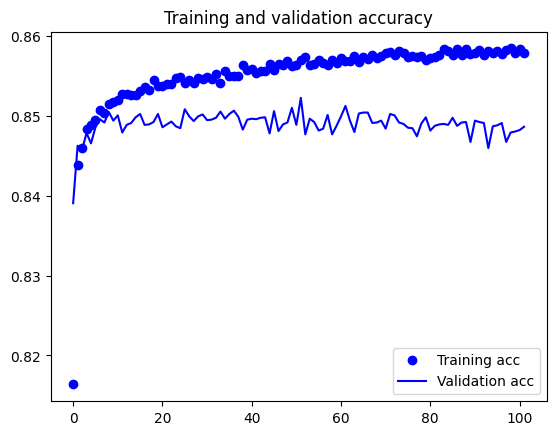

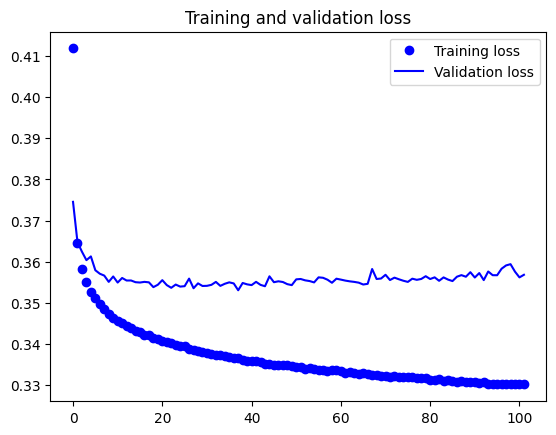

Training Accuracy:  0.8578277230262756
Validation Accuracy:  0.8486107587814331
527/527 [==============================] - 0s 731us/step


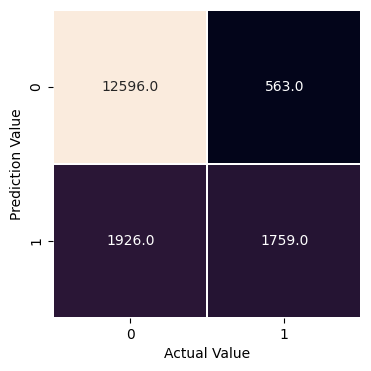

Fold 3
(67376, 19)
(67376,)
(16844, 19)
(16844,)
Epoch 1/1000
527/527 [==============================] - 2s 3ms/step - loss: 0.4225 - accuracy: 0.8059 - val_loss: 0.3708 - val_accuracy: 0.8404
Epoch 2/1000
527/527 [==============================] - 1s 3ms/step - loss: 0.3669 - accuracy: 0.8419 - val_loss: 0.3631 - val_accuracy: 0.8439
Epoch 3/1000
527/527 [==============================] - 1s 3ms/step - loss: 0.3612 - accuracy: 0.8448 - val_loss: 0.3594 - val_accuracy: 0.8461
Epoch 4/1000
527/527 [==============================] - 1s 3ms/step - loss: 0.3576 - accuracy: 0.8468 - val_loss: 0.3570 - val_accuracy: 0.8475
Epoch 5/1000
527/527 [==============================] - 1s 3ms/step - loss: 0.3550 - accuracy: 0.8473 - val_loss: 0.3552 - val_accuracy: 0.8478
Epoch 6/1000
527/527 [==============================] - 1s 3ms/step - loss: 0.3531 - accuracy: 0.8480 - val_loss: 0.3572 - val_accuracy: 0.8475
Epoch 7/1000
527/527 [==============================] - 1s 3ms/step - loss: 0.3517 - ac

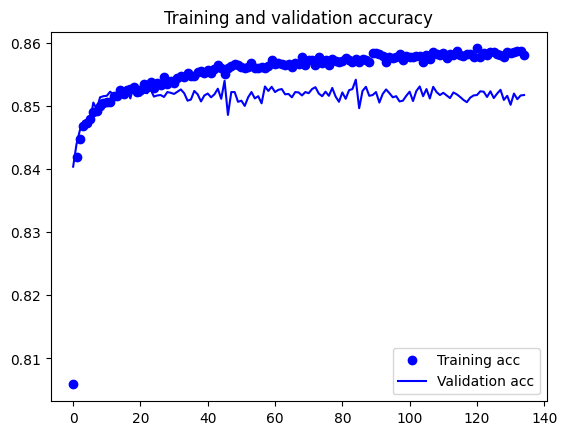

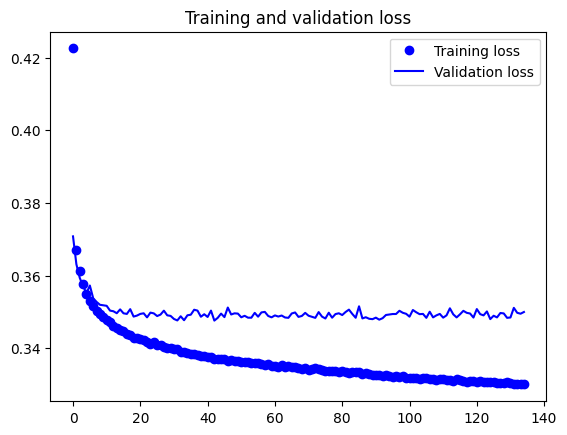

Training Accuracy:  0.8579761385917664
Validation Accuracy:  0.8516979217529297
527/527 [==============================] - 0s 687us/step


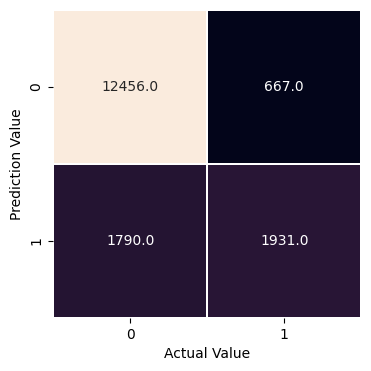

Fold 4
(67376, 19)
(67376,)
(16844, 19)
(16844,)
Epoch 1/1000
527/527 [==============================] - 2s 3ms/step - loss: 0.4020 - accuracy: 0.8272 - val_loss: 0.3687 - val_accuracy: 0.8408
Epoch 2/1000
527/527 [==============================] - 1s 3ms/step - loss: 0.3668 - accuracy: 0.8421 - val_loss: 0.3607 - val_accuracy: 0.8451
Epoch 3/1000
527/527 [==============================] - 1s 3ms/step - loss: 0.3611 - accuracy: 0.8447 - val_loss: 0.3583 - val_accuracy: 0.8450
Epoch 4/1000
527/527 [==============================] - 1s 3ms/step - loss: 0.3577 - accuracy: 0.8461 - val_loss: 0.3544 - val_accuracy: 0.8480
Epoch 5/1000
527/527 [==============================] - 1s 3ms/step - loss: 0.3552 - accuracy: 0.8474 - val_loss: 0.3534 - val_accuracy: 0.8483
Epoch 6/1000
527/527 [==============================] - 1s 3ms/step - loss: 0.3536 - accuracy: 0.8484 - val_loss: 0.3522 - val_accuracy: 0.8486
Epoch 7/1000
527/527 [==============================] - 1s 3ms/step - loss: 0.3516 - ac

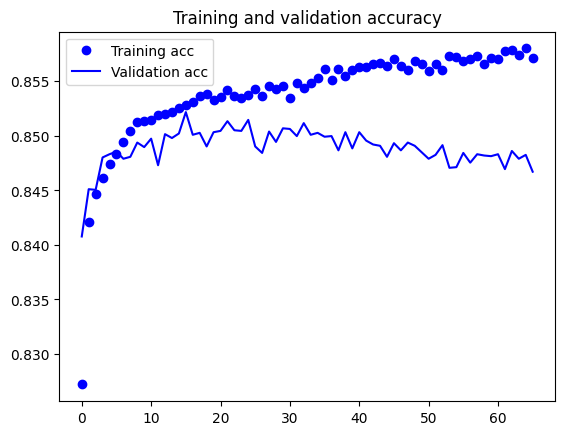

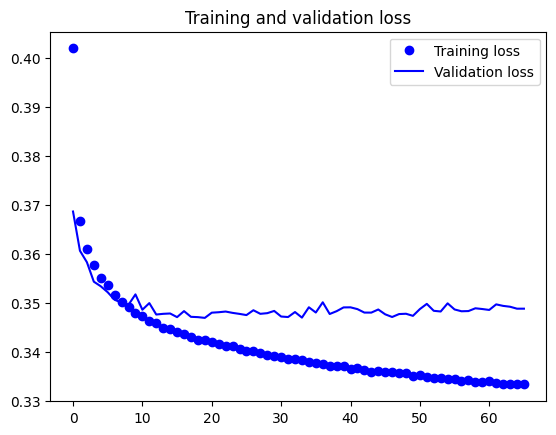

Training Accuracy:  0.8571746349334717
Validation Accuracy:  0.8467109799385071
527/527 [==============================] - 0s 679us/step


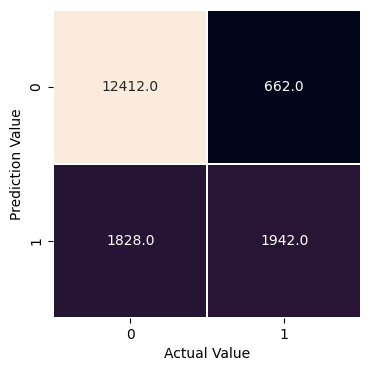

Fold 5
(67376, 19)
(67376,)
(16844, 19)
(16844,)
Epoch 1/1000
527/527 [==============================] - 2s 3ms/step - loss: 0.4156 - accuracy: 0.8120 - val_loss: 0.3709 - val_accuracy: 0.8378
Epoch 2/1000
527/527 [==============================] - 1s 3ms/step - loss: 0.3662 - accuracy: 0.8424 - val_loss: 0.3649 - val_accuracy: 0.8433
Epoch 3/1000
527/527 [==============================] - 1s 3ms/step - loss: 0.3608 - accuracy: 0.8444 - val_loss: 0.3625 - val_accuracy: 0.8449
Epoch 4/1000
527/527 [==============================] - 1s 3ms/step - loss: 0.3578 - accuracy: 0.8458 - val_loss: 0.3604 - val_accuracy: 0.8460
Epoch 5/1000
527/527 [==============================] - 1s 3ms/step - loss: 0.3555 - accuracy: 0.8474 - val_loss: 0.3595 - val_accuracy: 0.8478
Epoch 6/1000
527/527 [==============================] - 1s 3ms/step - loss: 0.3537 - accuracy: 0.8480 - val_loss: 0.3578 - val_accuracy: 0.8489
Epoch 7/1000
527/527 [==============================] - 1s 3ms/step - loss: 0.3524 - ac

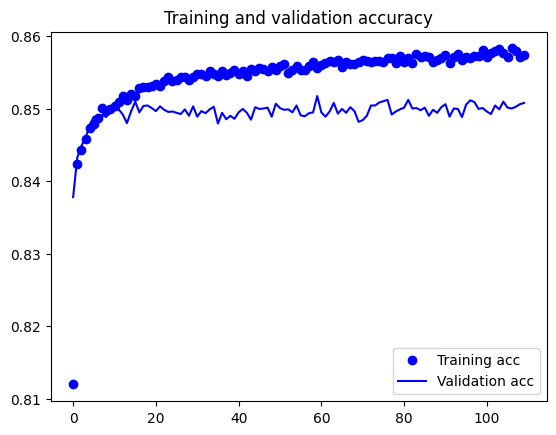

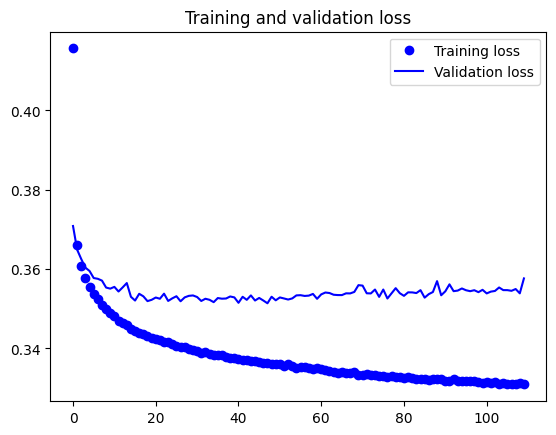

Training Accuracy:  0.8574715256690979
Validation Accuracy:  0.8508074283599854
527/527 [==============================] - 0s 725us/step


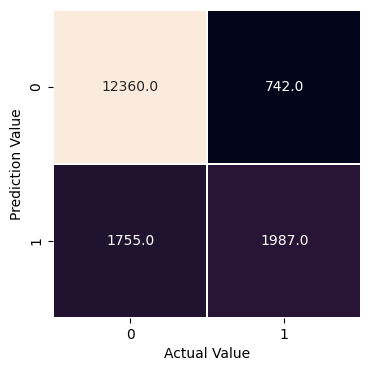

In [30]:
from sklearn.model_selection import KFold
from keras import Sequential
from keras.layers import Reshape, Dense, Flatten
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
import seaborn as sns

modelList = []

kf = KFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

    print(f"Fold {len(modelList) + 1}")
    print(X_train.shape)
    print(y_train.shape)
    print(X_test.shape)
    print(y_test.shape)

    model = Sequential()
    model.add(Reshape((-1,1), input_shape=(X.shape[1],1)))
    model.add(Flatten())
    # model.add(Dense(units=128, activation='relu',use_bias=True))
    # model.add(Dense(units=64, activation='relu',use_bias=True))
    model.add(Dense(units=32, activation='relu',use_bias=True))
    model.add(Dense(units=16, activation='relu',use_bias=True))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

    epoch=1000
    early_stopping = EarlyStopping(monitor='val_accuracy', patience=50, restore_best_weights=True)
    history = model.fit(X_train, y_train, epochs=epoch, batch_size=128, verbose=1, validation_data=(X_test, y_test), callbacks=[early_stopping])

    compare_TV(history)

    # トレーニングと検証の精度を表示
    training_accuracy = history.history['accuracy']
    validation_accuracy = history.history['val_accuracy']

    print("Training Accuracy: ", training_accuracy[-1])
    print("Validation Accuracy: ", validation_accuracy[-1])

    modelList.append(model)

    y_pred = model.predict(X_test)
    y_pred = (y_pred >= 0.5).astype(int)

    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(4,4))
    sns.heatmap(cm,annot=True,fmt='0.1f', linewidth = 0.1 , square = True , cbar = False)
    plt.ylabel("Prediction Value")
    plt.xlabel("Actual Value")
    plt.show()

In [31]:
import os

i = 0
if not os.path.exists('model'):
    os.makedirs('model')

for model in modelList:
    i += 1
    model.save('model/r2model_' + str(i) + '.h5')

In [32]:
df_test=pd.read_csv("theme2_test/test.csv")
df_test['Year'] = pd.to_datetime(df_test['Date']).dt.year
df_test['Month'] = pd.to_datetime(df_test['Date']).dt.month
df_test['Day'] = pd.to_datetime(df_test['Date']).dt.day
df_test_no_id = df_test.drop(['id', 'Date'], axis=1)


(28193, 24)
(28193, 19)
151/882 [====>.........................] - ETA: 0s

C:\Users\riuru\AppData\Local\Temp\ipykernel_10332\535682747.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test_filtered['WindGustDir'].fillna(df_test_filtered['WindGustDir'].mean(), inplace=True)
C:\Users\riuru\AppData\Local\Temp\ipykernel_10332\535682747.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setti

882/882 [==============================] - 1s 697us/step


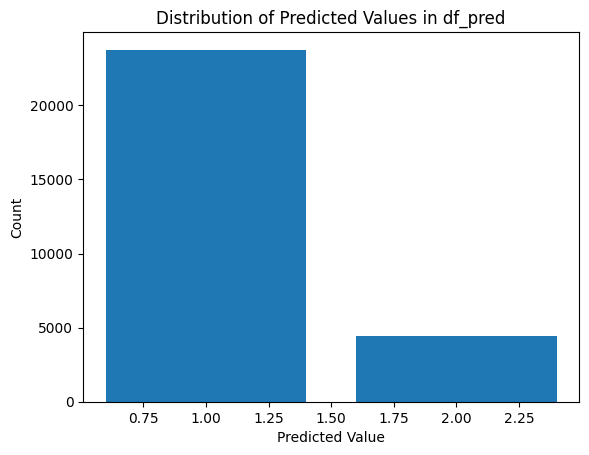

882/882 [==============================] - 1s 756us/step


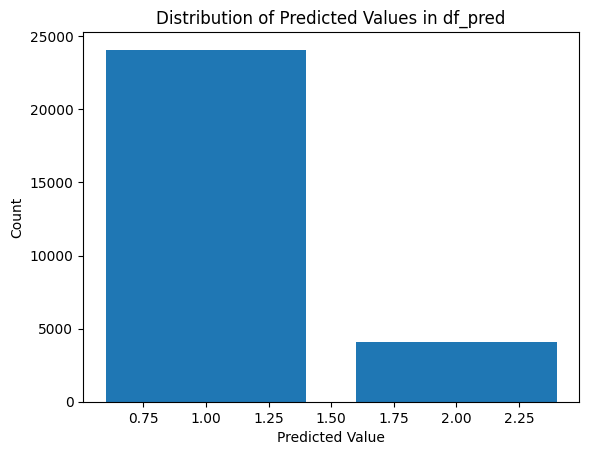

882/882 [==============================] - 1s 701us/step


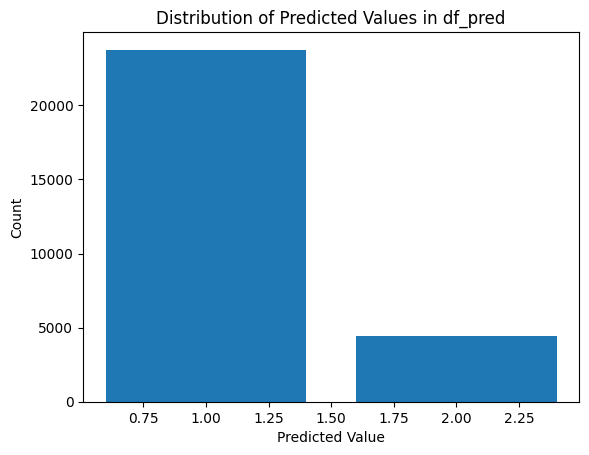

882/882 [==============================] - 1s 790us/step


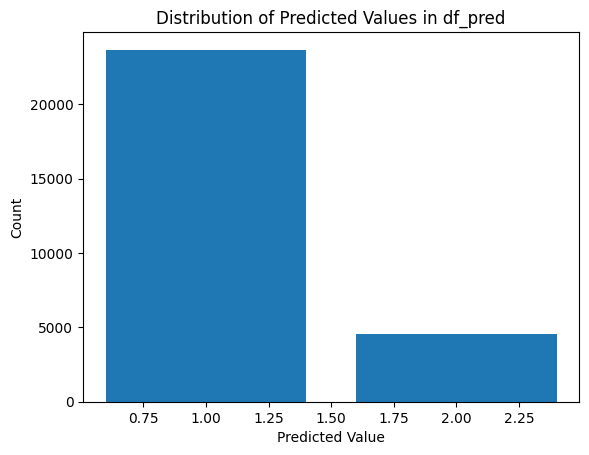

882/882 [==============================] - 1s 719us/step


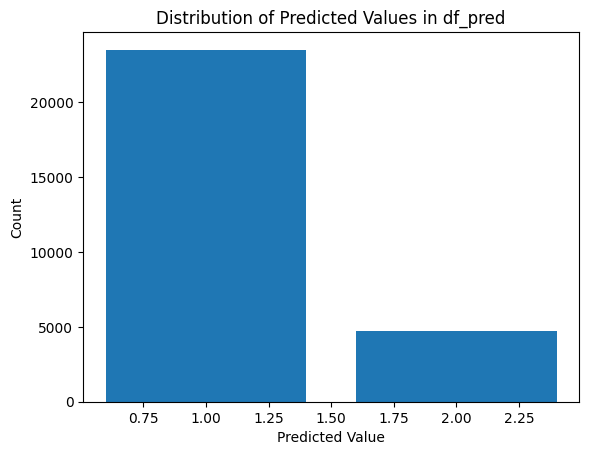

In [33]:
df_test_num = df_test_no_id.select_dtypes(include=[np.number])
df_test_num_filtered = power_transform(df_test_num)
df_test_no_id[df_test_num.columns] = df_test_num_filtered
df_test_filtered = df_test_no_id.drop(columns=high_vif_columns)
print(df_test_no_id.shape)
print(df_test_filtered.shape)

# Map the WindGustDir, WindDir9am, and WindDir3pm values to numbers
df_test_filtered['WindGustDir'] = df_test_filtered['WindGustDir'].map(wind_dir_mapping)
df_test_filtered['WindDir9am'] = df_test_filtered['WindDir9am'].map(wind_dir_mapping)
df_test_filtered['WindDir3pm'] = df_test_filtered['WindDir3pm'].map(wind_dir_mapping)

# Replace NaN values with the mean of the respective columns
df_test_filtered['WindGustDir'].fillna(df_test_filtered['WindGustDir'].mean(), inplace=True)
df_test_filtered['WindDir9am'].fillna(df_test_filtered['WindDir9am'].mean(), inplace=True)
df_test_filtered['WindDir3pm'].fillna(df_test_filtered['WindDir3pm'].mean(), inplace=True)

df_test_filtered = encX.fit_transform(df_test_filtered)
df_test_filtered = imputer.fit_transform(df_test_filtered)
df_test_filtered = scaler.transform(df_test_filtered)

df_test_pred_list = []
for model in modelList:
    df_test_pred = model.predict(df_test_filtered)
    df_test_pred = (df_test_pred >= 0.5).astype(int)+1
    df_test_pred_list.append(df_test_pred)

    unique, counts = np.unique(df_test_pred, return_counts=True)
    dict(zip(unique, counts))
    plt.bar(unique, counts)
    plt.xlabel('Predicted Value')
    plt.ylabel('Count')
    plt.title('Distribution of Predicted Values in df_pred')
    plt.show()

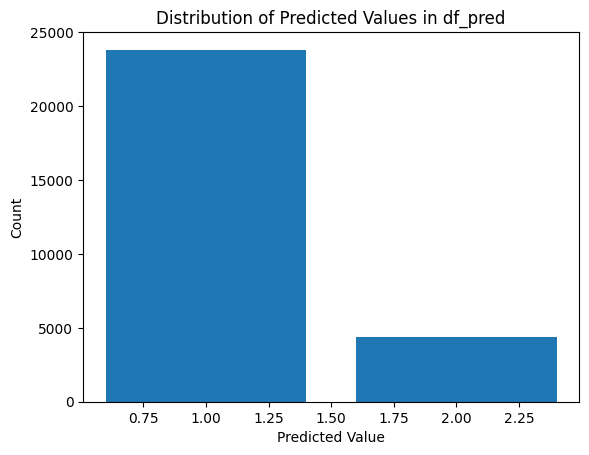

In [34]:
import os

df_pred = np.array(df_test_pred_list).sum(axis=0)
df_pred = (df_pred >= 8).astype(int)+1
unique, counts = np.unique(df_pred, return_counts=True)
plt.bar(unique, counts)
plt.xlabel('Predicted Value')
plt.ylabel('Count')
plt.title('Distribution of Predicted Values in df_pred')
plt.show()

df_pred_labels = pd.DataFrame(df_pred, columns=['RainTomorrow']).replace({1: 'No', 2: 'Yes'})
result = pd.concat([df_test['id'], df_pred_labels], axis=1)
if not os.path.exists('dist'):
    os.makedirs('dist')
result.to_csv('dist/Theme2_kaku_submit_KFold_r2.csv', index=False, header=False)

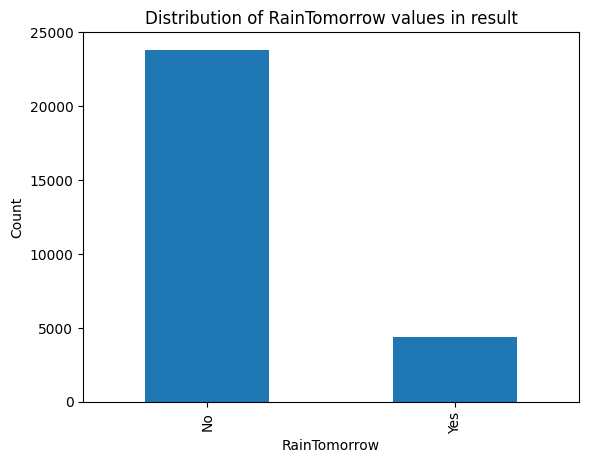

In [35]:
result['RainTomorrow'].value_counts().plot(kind='bar')
plt.xlabel('RainTomorrow')
plt.ylabel('Count')
plt.title('Distribution of RainTomorrow values in result')
plt.show()